<h1><center>CSE391 programming for data science</center></h1>

<h1><center>Lecture 7</center></h1>
<h1><center>Feb 8th ,2018 </center></h1>


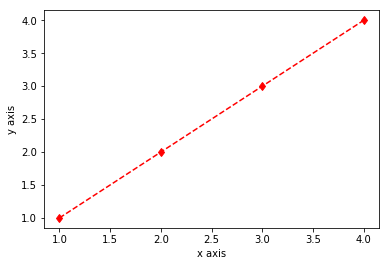

In [72]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[1,2,3,4], '--dr')
plt.ylabel('y axis')
plt.xlabel('x axis')
plt.show()

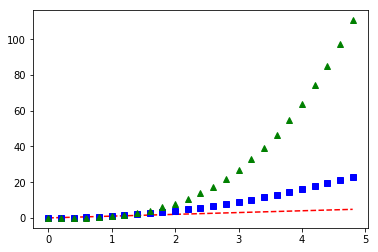

In [35]:
t = np.arange(0,5,0.2)
plt.plot(t,t,'--r',t,t**2,'bs',t,t**3,'g^')
plt.show()

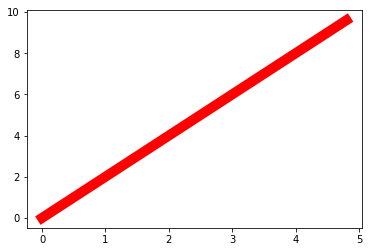

In [73]:
t = np.arange(0,5,0.2)
lines, = plt.plot(t,2*t)
# use keyword args
plt.setp(lines, color='r', linewidth=10.0)
# or MATLAB style string value pairs
#plt.setp(lines, 'color', 'r', 'linewidth', 2.0)
plt.show()

Working with texts

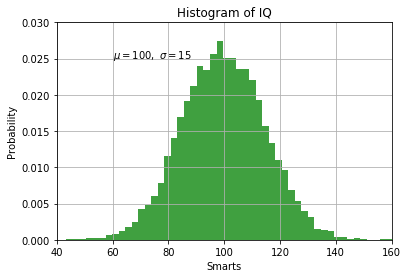

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

Working with multiple figures and axes

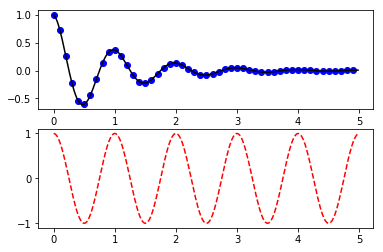

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

# More on using matplotlib

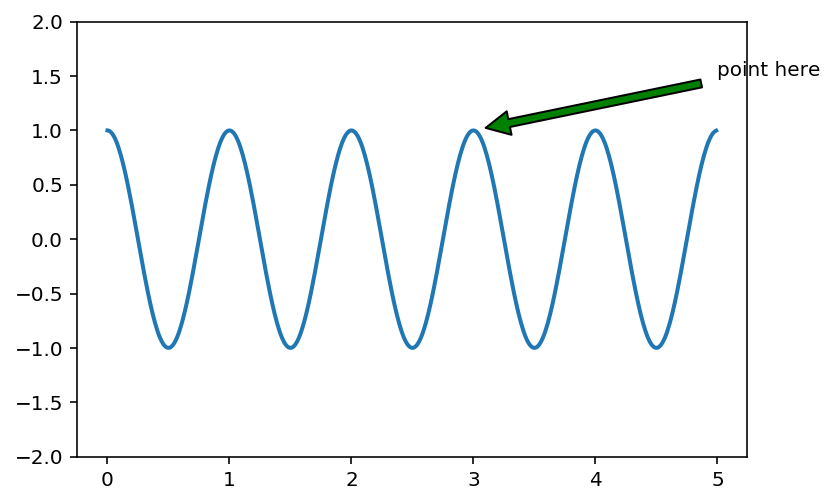

In [239]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('point here', xy=(3, 1), xytext=(5, 1.5),
            arrowprops=dict(facecolor='green', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()

In [ ]:
import numpy as np
x = np.array([[1,2],[3,4]])

print(x.T)

In [52]:
%pycat /Users/martin/Desktop/py391.py

In [88]:
x = np.array([1,2])
x.T.shape



(2,)

# Multivariate normal distribution
## two methods to generate data :
- using built in function
- write your own scrtips ( see the two examples below)

$\begin{bmatrix}
    X_1-M_1& X_2-M_2 
\end{bmatrix}\begin{bmatrix}
    \sigma^2_{11}& \sigma^2_{12}  \\
    \sigma^2_{21}& \sigma^2_{22}
\end{bmatrix}^{-1}\begin{bmatrix}
    X_1-M1  \\
    X_2-M2
\end{bmatrix}$

$p(x=[0,1])=\frac{1}{\sqrt{2^D\pi|\Sigma|}} \exp\Big(-\frac{(
 x-M)^T\Sigma^{-1}(x-M)}{2}\Big)= 0.7$
 
 $x_{1\times N}^T$
 $\Sigma_{N\times N}$

#  using scipy builtin function 

In [35]:
from scipy.stats import multivariate_normal
P_x = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
P_x.pdf([1,0])




0.096532352630053928

# two example to implement the multivariate normal distribution given below

In [39]:
import numpy as np

def pdf_multivariate_gauss(x, mu, cov):
    '''
    Caculate the multivariate normal density (pdf)

    Keyword arguments:
        x = numpy array of a "d x 1" sample vector
        mu = numpy array of a "d x 1" mean vector
        cov = "numpy array of a d x d" covariance matrix
    '''
    assert(mu.shape[0] > mu.shape[1]), 'mu must be a row vector'
    assert(x.shape[0] > x.shape[1]), 'x must be a row vector'
    assert(cov.shape[0] == cov.shape[1]), 'covariance matrix must be square'
    assert(mu.shape[0] == cov.shape[0]), 'cov_mat and mu_vec must have the same dimensions'
    assert(mu.shape[0] == x.shape[0]), 'mu and x must have the same dimensions'
    part1 = 1 / ( ((2* np.pi)**(len(mu)/2)) * (np.linalg.det(cov)**(1/2)) )
    part2 = (-1/2) * ((x-mu).T.dot(np.linalg.inv(cov))).dot((x-mu))
    return float(part1 * np.exp(part2))

In [42]:
?pdf_multivariate_gauss

In [24]:
from numpy import *
import math
# covariance matrix
sigma = matrix([[2.3, 0, 0, 0],
           [0, 1.5, 0, 0],
           [0, 0, 1.7, 0],
           [0, 0,   0, 2]
          ])
# mean vector
mu = array([2,3,8,10])

# input
x = array([2.1,3.5,8, 9.5])

def norm_pdf_multivariate(x, mu, sigma):
    size = len(x)
    if size == len(mu) and (size, size) == sigma.shape:
        det = linalg.det(sigma)
        if det == 0:
            raise NameError("The covariance matrix can't be singular")

        norm_const = 1.0/ ( math.pow((2*pi),float(size)/2) * math.pow(det,1.0/2) )
        x_mu = matrix(x - mu)
        inv = sigma.I        
        result = math.pow(math.e, -0.5 * (x_mu * inv * x_mu.T))
        return norm_const * result
    else:
        raise NameError("The dimensions of the input don't match")

print(norm_pdf_multivariate(x, mu, sigma))

0.006378411393413104
